### Sentiment Review Model

### Part 2

## Environment Check

In [3]:
import sys
print(sys.executable)

C:\Users\Robert\Desktop\d803-natural-language-processing\.venv\Scripts\python.exe


In [4]:
import sys
import pandas as pd
import sklearn

print("Python:", sys.version)
print("Executable:", sys.executable)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)

Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Executable: C:\Users\Robert\Desktop\d803-natural-language-processing\.venv\Scripts\python.exe
pandas: 2.3.3
scikit-learn: 1.8.0


## NLP Model Code

Loaded dataset from: C:\Users\Robert\Desktop\d803-natural-language-processing\data\amazon_reviews_1000_cleaned.csv
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       108
           1       0.89      0.70      0.78        92

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200
 



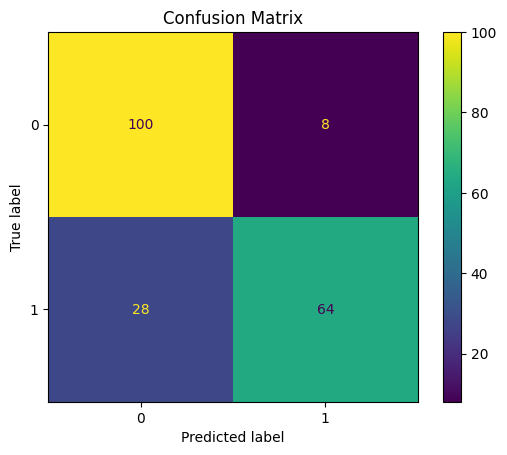

[[100   8]
 [ 28  64]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# Load cleaned data
candidates = [
    Path("data/amazon_reviews_1000_cleaned.csv"),
    Path("../data/amazon_reviews_1000_cleaned.csv"),
]

for p in candidates:
    if p.exists():
        df = pd.read_csv(p)
        print(f"Loaded dataset from: {p.resolve()}")
        break
else:
    raise FileNotFoundError("Could not find amazon_reviews_1000_cleaned.csv in data/ or ../data/")

X = df["clean_text"].fillna(df["review_text"]).astype(str)
y = df["label"].astype(int)

# Make labels more interpretable in reports
if set(y.unique()) == {1, 2}:
    y = y.map({1: 0, 2: 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred), "\n")

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")   # "d" = show whole numbers
plt.title("Confusion Matrix")
plt.show()

print(confusion_matrix(y_test, pred))

## Model Optimization

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "clf__C": [0.1, 1, 10],
    "clf__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    model,
    param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=1,
    verbose=1,
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [7]:
print("Best params:", grid.best_params_)
print("Best CV score (f1_macro):", grid.best_score_)

Best params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'tfidf__ngram_range': (1, 2)}
Best CV score (f1_macro): 0.8002885302169689


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       108
           1       0.80      0.78      0.79        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



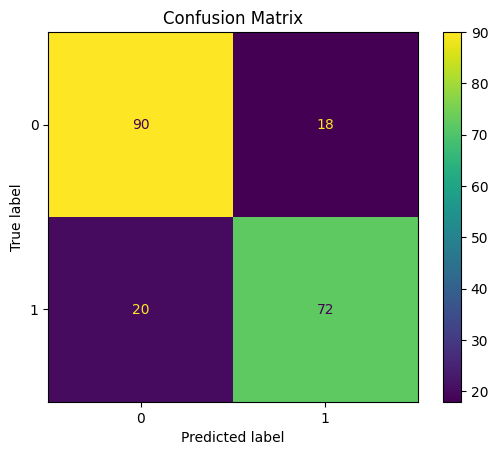

[[90 18]
 [20 72]]


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, best_pred))

cm = confusion_matrix(y_test, best_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")   # "d" = show whole numbers
plt.title("Confusion Matrix")
plt.show()

print(confusion_matrix(y_test, best_pred))